# **Cluster-Based Music Recommendation Engine for Spotify**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [2]:
# --- 1. Data Pre-processing Operations ---
print("--- Data Pre-processing ---")

# Load the dataset
df = pd.read_csv("spotify dataset.csv")

# Display initial information
print("First 5 rows of the dataset:")
print(df.head())
print("\nGeneral information about the dataset:")
print(df.info())
print("\nDescriptive statistics of the dataset:")
print(df.describe())
print("\nMissing values in each column (before dropping):")
print(df.isnull().sum())

# Drop rows with missing values (small number, safe to drop)
df.dropna(inplace=True)
print("\nMissing values after dropping rows:")
print(df.isnull().sum())
print(f"Shape of the dataframe after dropping rows: {df.shape}")

# Convert 'track_album_release_date' to datetime (optional for this project, but good practice)
# df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

--- Data Pre-processing ---
First 5 rows of the dataset:
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_releas


--- Data Analysis and Visualizations ---


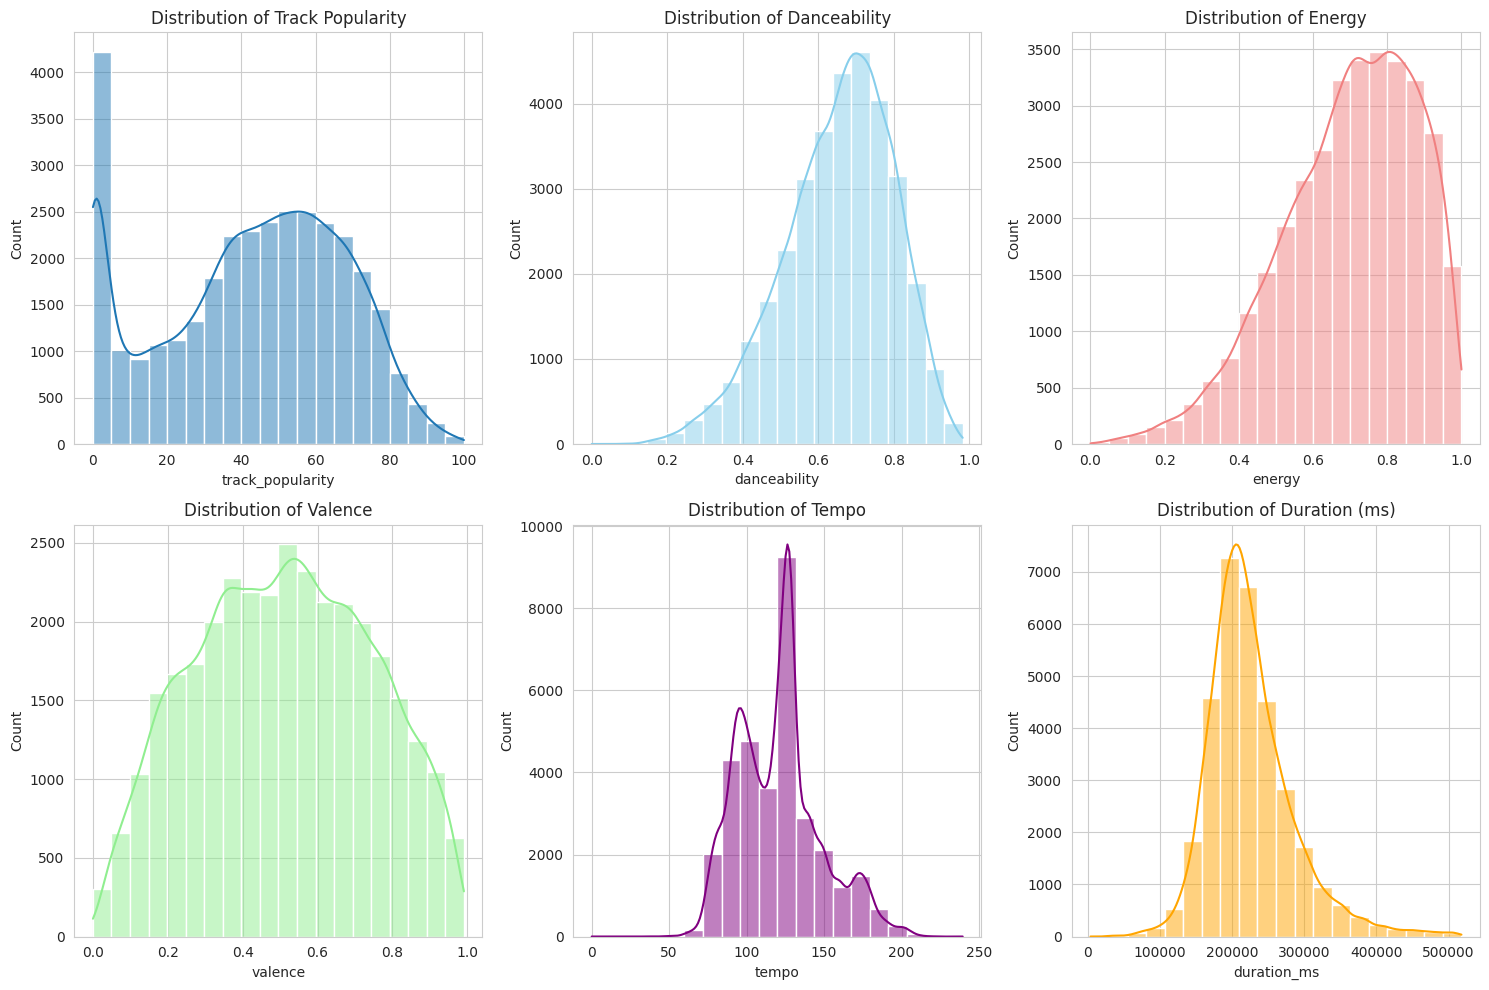

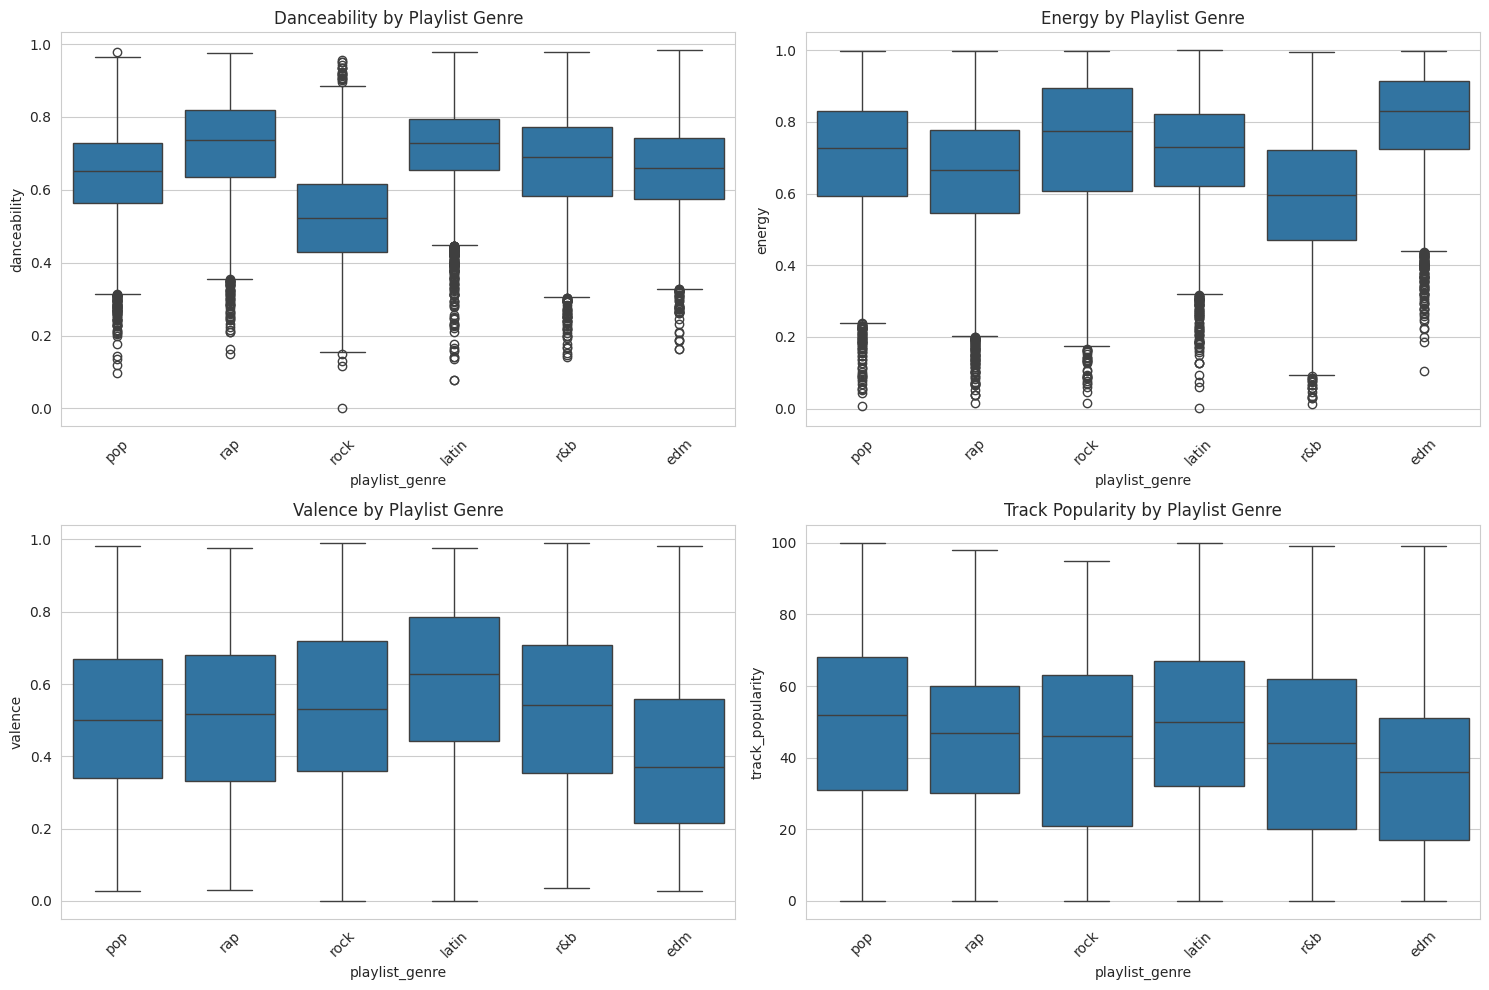

In [3]:
# --- 2. Data Analysis and Visualizations ---
print("\n--- Data Analysis and Visualizations ---")

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot distributions of key numerical features
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['track_popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')

plt.subplot(2, 3, 2)
sns.histplot(df['danceability'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Danceability')

plt.subplot(2, 3, 3)
sns.histplot(df['energy'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Energy')

plt.subplot(2, 3, 4)
sns.histplot(df['valence'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Valence')

plt.subplot(2, 3, 5)
sns.histplot(df['tempo'], bins=20, kde=True, color='purple')
plt.title('Distribution of Tempo')

plt.subplot(2, 3, 6)
sns.histplot(df['duration_ms'], bins=20, kde=True, color='orange')
plt.title('Distribution of Duration (ms)')

plt.tight_layout()
plt.show()

# Box plots to understand distribution across genres for key features
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='playlist_genre', y='danceability', data=df)
plt.title('Danceability by Playlist Genre')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.boxplot(x='playlist_genre', y='energy', data=df)
plt.title('Energy by Playlist Genre')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.boxplot(x='playlist_genre', y='valence', data=df)
plt.title('Valence by Playlist Genre')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.boxplot(x='playlist_genre', y='track_popularity', data=df)
plt.title('Track Popularity by Playlist Genre')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


--- Correlation Matrix ---


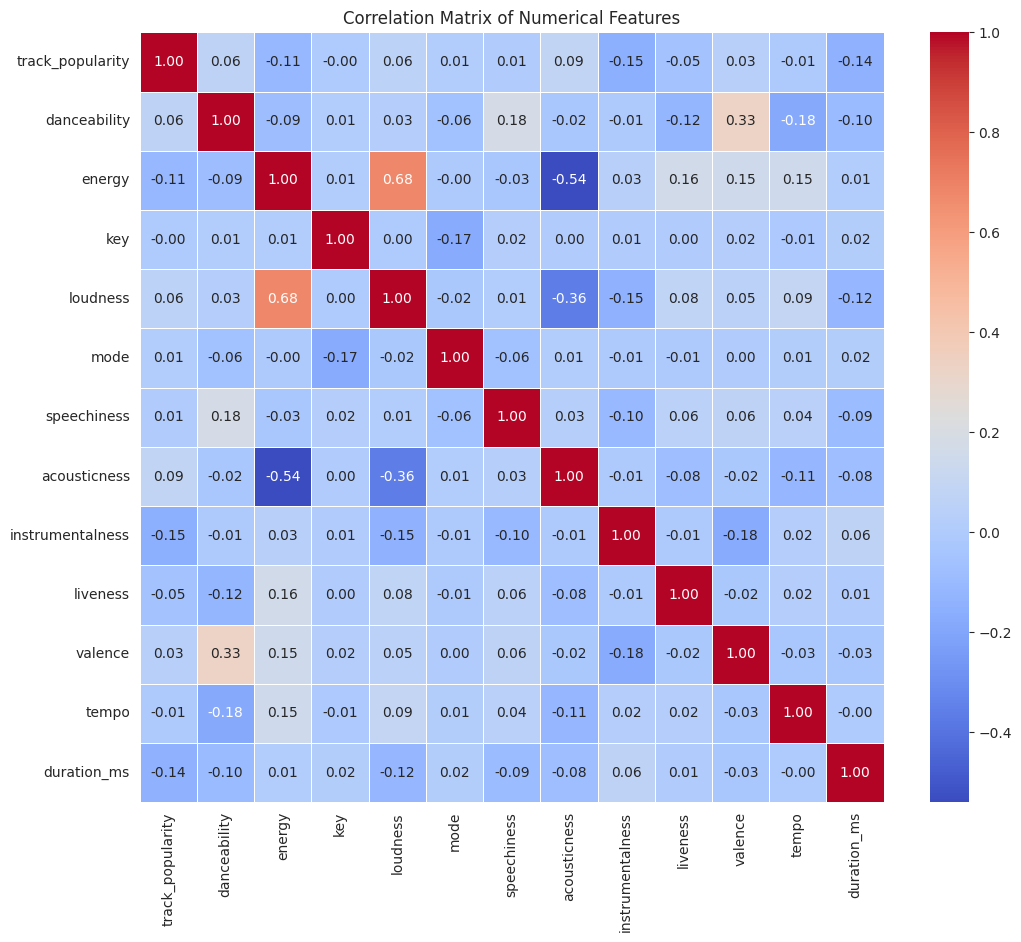

In [4]:
# --- 3. Correlation Matrix of Features ---
print("\n--- Correlation Matrix ---")

# Select only numerical columns for correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


--- Clustering Analysis ---


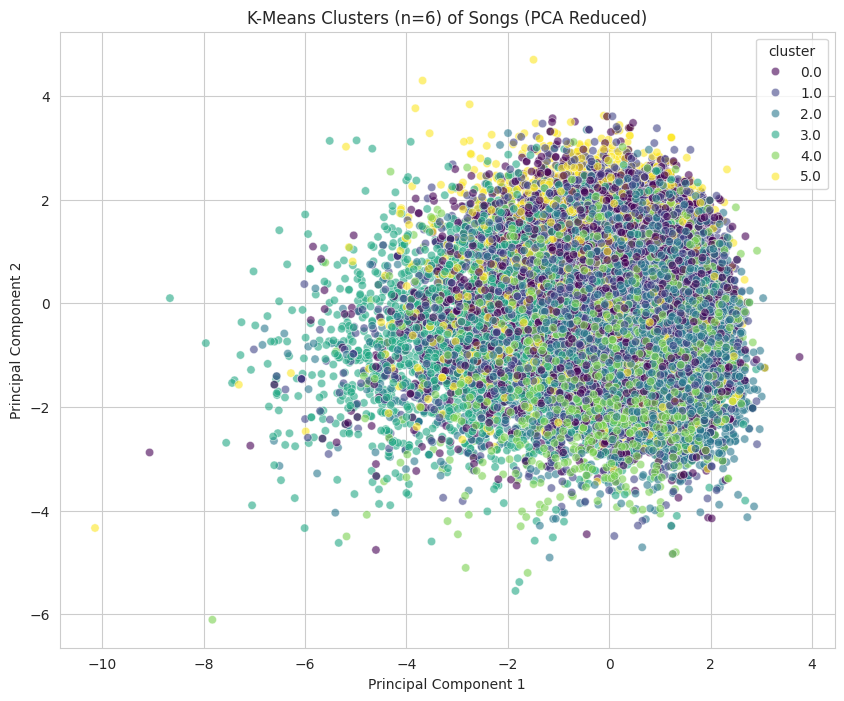

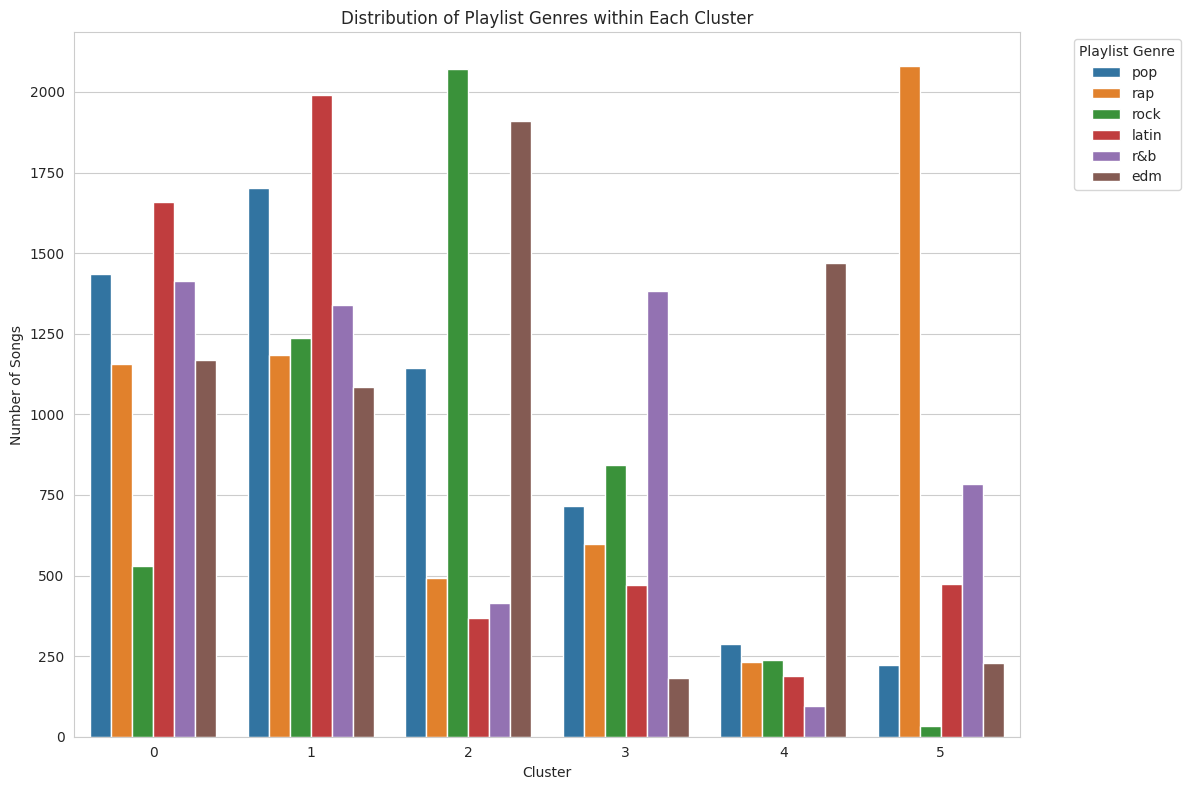

<ipython-input-5-1837700261>:54: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


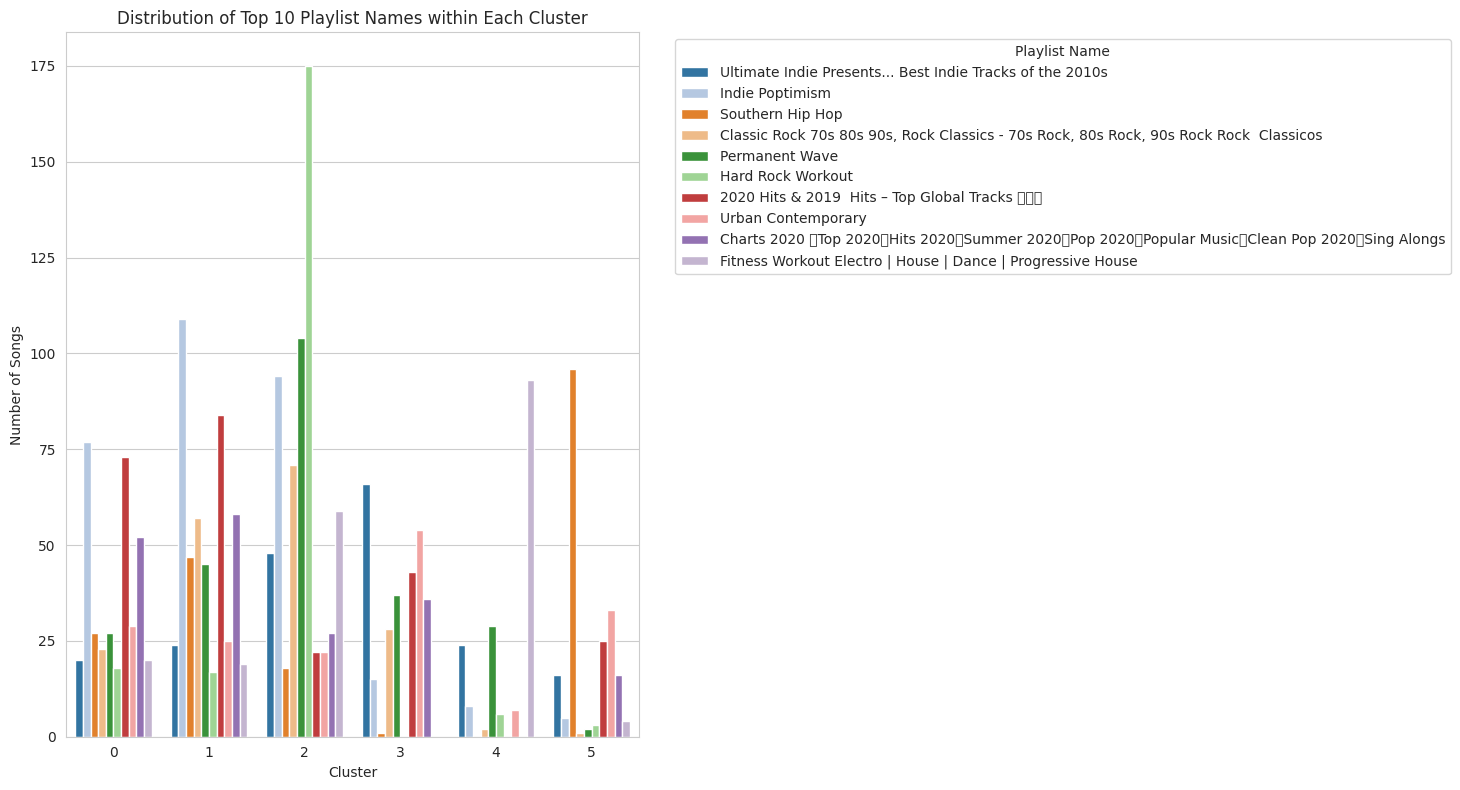

In [5]:
# --- 4. Find out and plot different clusters ---
print("\n--- Clustering Analysis ---")

# Select features for clustering (audio features)
features_for_clustering = ['danceability', 'energy', 'key', 'loudness', 'mode',
                           'speechiness', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo', 'duration_ms']

X = df[features_for_clustering]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering. Using the number of unique genres as n_clusters.
n_clusters = df['playlist_genre'].nunique()
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init to suppress warning
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']
df_pca['playlist_genre'] = df['playlist_genre'] # Add playlist_genre for combined analysis

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis', legend='full', alpha=0.6)
plt.title(f'K-Means Clusters (n={n_clusters}) of Songs (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Analyze clusters by playlist genre
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster', hue='playlist_genre', data=df, palette='tab10')
plt.title('Distribution of Playlist Genres within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.legend(title='Playlist Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analyze clusters by playlist name (Top N playlist names for visualization)
top_playlists = df['playlist_name'].value_counts().head(10).index
df_top_playlists = df[df['playlist_name'].isin(top_playlists)]

plt.figure(figsize=(15, 8))
sns.countplot(x='cluster', hue='playlist_name', data=df_top_playlists, palette='tab20')
plt.title('Distribution of Top 10 Playlist Names within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.legend(title='Playlist Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
# --- 5. Build your model and show your final result (Recommendation System) ---
print("\n--- Recommendation System Model ---")

def recommend_songs(track_id, df, num_recommendations=5):
    if track_id not in df['track_id'].values:
        print(f"Track ID '{track_id}' not found in the dataset.")
        return pd.DataFrame()

    # Get the cluster of the input track
    input_track_cluster = df[df['track_id'] == track_id]['cluster'].iloc[0]

    # Filter songs in the same cluster, excluding the input track itself
    cluster_songs = df[
        (df['cluster'] == input_track_cluster) &
        (df['track_id'] != track_id)
    ]

    # If there are not enough songs in the cluster, recommend all available
    if len(cluster_songs) < num_recommendations:
        print(f"Only {len(cluster_songs)} recommendations available in the cluster.")
        return cluster_songs[['track_name', 'track_artist']].sample(n=len(cluster_songs), random_state=42)
    else:
        # Randomly sample recommendations from the cluster
        return cluster_songs[['track_name', 'track_artist']].sample(n=num_recommendations, random_state=42)


--- Recommendation System Model ---


In [13]:
# Example Usage of the Recommendation System:
# Let's pick a random track from the dataset for demonstration
random_track = df.sample(1, random_state=42)
example_track_id = random_track['track_id'].iloc[0]
example_track_name = random_track['track_name'].iloc[0]

In [14]:
print(f"\n--- Recommendations for '{example_track_name}' (ID: {example_track_id}) ---")
recommendations = recommend_songs(example_track_id, df, num_recommendations=5)
if not recommendations.empty:
    print(recommendations)


--- Recommendations for 'Perfect (feat. Haris) - LUM!X Remix' (ID: 3m0BCyPaS5BN5iQgtdPr0u) ---
                                              track_name  track_artist
17880                                        Hace Tiempo       Fonseca
16837                               Feelings - KAJ Remix   Deep Chills
5928   Bad Vibe (feat. A Boogie Wit da Hoodie & 2 Cha...  Quando Rondo
1291                                          Supalonely         BENEE
2237                                          Act My Age    Katy Perry
